In [1]:
# Let's start by importing the necessary libraries

import numpy as np 
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

# Exploratory analysis of the dataset 

### Downloading the dataset from the official Seattle GeoData website (https://data-seattlecitygis.opendata.arcgis.com/)

In [2]:
# Reading the dataset into a panda dataframe

df = pd.read_csv('http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


### Exploring the dataset after reading it into a panda dataframe

In [3]:
# Taking a look at the top 5 rows using the head() function

df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [4]:
# Getting basic information about the dataset using the info() method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    101335 non-null  object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     221738 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

In [5]:
# Getting the list of column headers we can call upon the dataframe's .columns parameter

df.columns.values 

array(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'], dtype=object)

In [6]:
# Getting the list of indicies with the .index parameter

df.index.values 

array([     0,      1,      2, ..., 221735, 221736, 221737])

In [7]:
# Let's find out the size of dataframe (rows, columns)

df.shape

(221738, 40)

In [8]:
# How many null data per column? (axis=0: rows, axis=1: columns)

df.isnull().sum()

X                    7478
Y                    7478
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3714
INTKEY             149711
LOCATION             4593
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209953
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26451
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11979
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191550
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
PEDROWNOTGRNT      216543
SDOTCOLNUM          94533
SPEEDING           211802
ST_COLCODE           9413
ST_COLDESC          26451
SEGLANEKEY              0
CROSSWALKKEY

### Cleaning the dataset:
##### - dropping some unnecessary columns
##### - replacing the missing values
##### - identifying the independent and dependent variables that we are going to work on

In [9]:
# Getting a quick description of the data

df.describe(include=['object'])

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,INCDATE,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,221738,221738,218024,217145,101335,11785,221737,221738,195287,221738,...,30188,195307,195097,195178,195008,5195,9936,212325,195287,221738
unique,221735,2,3,25209,2,1,5,5,10,6109,...,1,4,12,9,9,1,1,63,62,2
top,1776526,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,195360,145118,298,89550,11785,137776,137776,48558,103,...,30188,104002,114807,128660,119555,5195,9936,44937,44937,209649


In [10]:
df.drop(['REPORTNO', 'STATUS', 'EXCEPTRSNCODE','EXCEPTRSNDESC','SDOT_COLDESC'], axis=1, inplace=True)
df.drop(['INCKEY','COLDETKEY'], axis=1, inplace=True)
df.drop(['INTKEY', 'INCDTTM','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLDESC'], axis=1, inplace=True)

df.rename(columns = {'X': 'Longitude','Y':'Latitude', 'ADDRTYPE':'Address type'},inplace = True)
df.shape
df.head()

,Longitude,Latitude,OBJECTID,Address type,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,Intersection,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,Angles,2,0,...,NaN,N,Clear,Dry,Daylight,NaN,10,0,0,N
1,-122.361405,47.702064,2,Block,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,Rear Ended,2,0,...,Y,0,Raining,Wet,Dusk,NaN,13,0,0,N
2,-122.317414,47.664028,3,Block,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,Head On,2,0,...,NaN,N,Clear,Dry,Dark - Street Lights On,NaN,30,0,0,N
3,-122.318234,47.619927,4,Intersection,11TH AVE E AND E JOHN ST,2,Injury Collision,Pedestrian,3,1,...,NaN,N,Raining,Wet,Dark - Street Lights On,NaN,0,0,0,N
4,-122.351724,47.560306,5,Block,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,Other,2,0,...,NaN,0,Clear,Ice,Dark - Street Lights On,Y,50,0,0,N


# Visualizing the data and exploring correlations with some basic plots

### Exploring the data by quickly plotting the numbers of people involved in an accident by year, month and day of the week

In [11]:
# Let's make the date and time more manageable by converting it with the to_datetime panda function:

df['INCDATE'] = pd.to_datetime(df['INCDATE'])

df['Year'] = df['INCDATE'].dt.year 
df['Month'] = df['INCDATE'].dt.month 
df['DayOfWeek'] = df['INCDATE'].dt.dayofweek

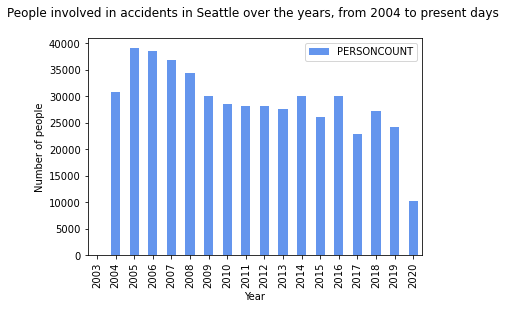

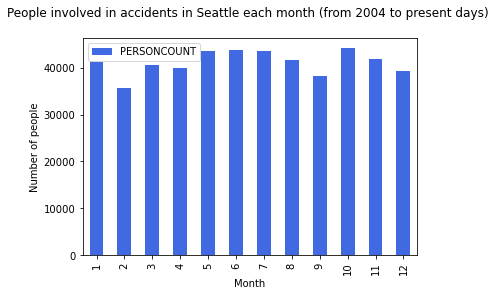

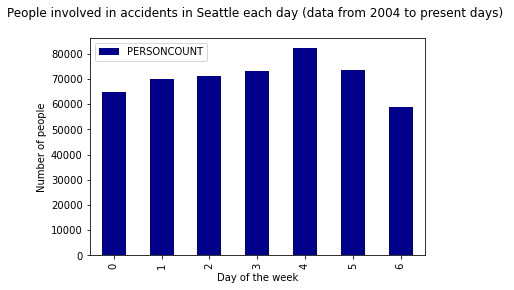

In [12]:
# By doing this, we are able to group the data by year, time or day of the week and see if there is any trend in the accidents number

df[['Year', 'PERSONCOUNT']].groupby('Year').sum().plot(kind='bar', figsize=(6, 4), color='cornflowerblue')

plt.title('People involved in accidents in Seattle over the years, from 2004 to present days \n')
plt.ylabel('Number of people')
plt.xlabel('Year')

plt.show()

df[['Month', 'PERSONCOUNT']].groupby('Month').sum().plot(kind='bar', figsize=(6, 4), color='royalblue')

plt.title('People involved in accidents in Seattle each month (from 2004 to present days) \n')
plt.ylabel('Number of people')
plt.xlabel('Month')

plt.show()

df[['DayOfWeek', 'PERSONCOUNT']].groupby('DayOfWeek').sum().plot(kind='bar', figsize=(6, 4), color='darkblue')

plt.title('People involved in accidents in Seattle each day (data from 2004 to present days) \n')
plt.ylabel('Number of people')
plt.xlabel('Day of the week')

plt.show()

In [13]:
df.groupby('SEVERITYCODE').sum()

,Longitude,Latitude,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,Year,Month,DayOfWeek
SEVERITYCODE,,,,,,,,,,,,,,,,
0,-2.396133e+06,9.328793e+05,2663107162,4163,2,0,1,0,0,0,169920.0,661866,20735568,43576631,145048,61689
1,-1.633127e+07,6.357157e+06,14973946307,320848,726,688,267986,0,0,0,1794859.0,6274252,208617840,277090507,900416,407403
2,-7.067007e+06,2.751066e+06,6568319764,159671,6587,4911,110099,78206,0,0,932382.0,46618004,1700550342,118354555,386639,170334
2b,-3.740919e+05,1.456209e+05,339221109,8012,982,437,4890,4425,3268,0,62672.0,4418777,165672895,6256715,20355,9221
3,-4.195915e+04,1.633116e+04,39191450,1057,150,28,506,291,103,377,7723.0,260997,26022290,707988,2448,1107


### Exploring the severity of the accidents for the people involved, either drivers, bikers or pedestrians

##### Let's plot two more bar plots and look at the counts of people involved in an accident, split into the different ranking of severity of the accident: from no injury to fatality, with 5 increasing levels of severity (1, 2, 3, 4, 5 with 1 corresponding to no injuries and 5 corresponding to fatality)

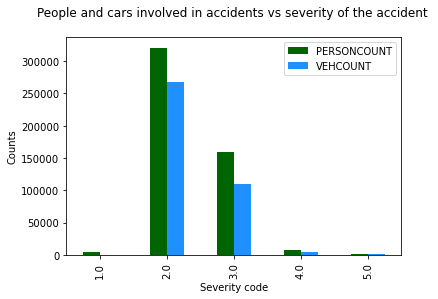

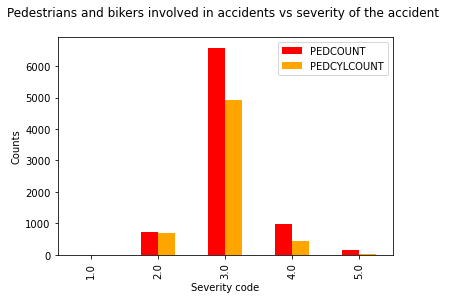

In [14]:
# I'll start by replacing the text cirresponding to the severity code with numeric values, from 1 to 5:

df['SEVERITYCODE'].replace(to_replace=['0', '1', '2', '2b', '3'], value=[1, 2, 3, 4, 5], inplace=True)

df[['SEVERITYCODE','PERSONCOUNT', 'VEHCOUNT']].groupby('SEVERITYCODE').sum().plot(kind='bar', color=('darkgreen', 'dodgerblue'))

plt.title('People and cars involved in accidents vs severity of the accident \n')
plt.ylabel('Counts')
plt.xlabel('Severity code')

plt.show()

df[['SEVERITYCODE', 'PEDCOUNT', 'PEDCYLCOUNT']].groupby('SEVERITYCODE').sum().plot(kind='bar', color=('red', 'orange'))

plt.title('Pedestrians and bikers involved in accidents vs severity of the accident \n')
plt.ylabel('Counts')
plt.xlabel('Severity code')

plt.show()

##### It is worth noticing that the accidents result in more severe outcomes for bikers and pedestrians. While this can be expected, it is a good example of an efficient use of data to identify issues and suggest improvements.

### Exploring the severity of the accidents depending on variables such as the weather and the conditions of the illumination and of the road 

##### Let's quickly plot four bar plots and look at the counts of people involved in an accident depending on the weather, illumination and road conditions

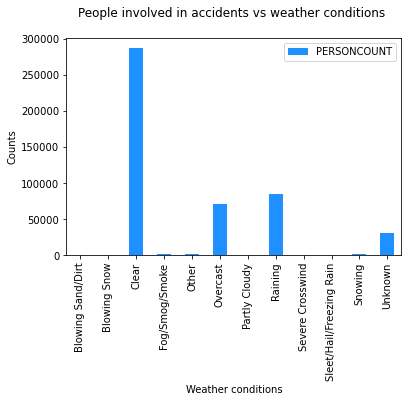

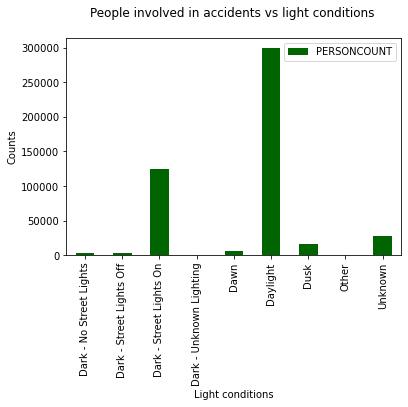

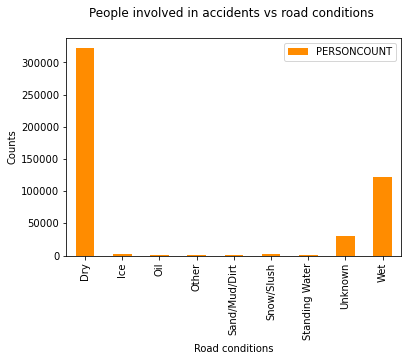

In [15]:
df[['WEATHER','PERSONCOUNT']].groupby('WEATHER').sum().plot(kind='bar', color=('dodgerblue'))

plt.title('People involved in accidents vs weather conditions \n')
plt.ylabel('Counts')
plt.xlabel('Weather conditions')

plt.show()

df[['LIGHTCOND','PERSONCOUNT']].groupby('LIGHTCOND').sum().plot(kind='bar', color=('darkgreen'))

plt.title('People involved in accidents vs light conditions \n')
plt.ylabel('Counts')
plt.xlabel('Light conditions')

plt.show()

df[['ROADCOND','PERSONCOUNT']].groupby('ROADCOND').sum().plot(kind='bar', color=('darkorange'))

plt.title('People involved in accidents vs road conditions \n')
plt.ylabel('Counts')
plt.xlabel('Road conditions')

plt.show()

In [16]:
# Now we can replace some descriptive features as numerical values, as we did with the Severity Score

df['WEATHER'].replace(to_replace=['Clear', 'Raining', 'Overcast', 'Unknown', 'Fog/Smog/Smoke', 'Snowing', 'Other', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy', 'Blowing Snow'], value=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

df['ROADCOND'].replace(to_replace=['Dry','Wet', 'Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'], value=[1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

df['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Unknown', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'], value=[1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

df['COLLISIONTYPE'].replace(to_replace=['Parked Car', 'Angles', 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn', 'Right Turn', 'Head On', 'Pedestrian', 'Cycles'], value=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True) 

df['JUNCTIONTYPE'].replace(to_replace=['At Intersection (intersection related)', 'Mid-Block (not related to intersection)','Mid-Block (but intersection related)','Driveway Junction', 'At Intersection (but not related to intersection)', 'Ramp Junction', 'Unknown'], value=[1, 2, 3, 4, 5, 6, 7], inplace=True)

df['Address type'].replace(to_replace=['Block','Intersection', 'Alley'], value=[1, 2, 3],inplace=True)

df['HITPARKEDCAR'].replace(to_replace=['N', 'Y'], value=[0, 1], inplace=True)

In [17]:
# Then, we drop the NA values from the columns we are interested in

df = df.dropna(subset = ['WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','LOCATION','JUNCTIONTYPE','Address type'])
df.isna().sum()/len(df)

Longitude          0.014078
Latitude           0.014078
OBJECTID           0.000000
Address type       0.000000
LOCATION           0.000000
SEVERITYCODE       0.000000
SEVERITYDESC       0.000000
COLLISIONTYPE      0.000000
PERSONCOUNT        0.000000
PEDCOUNT           0.000000
PEDCYLCOUNT        0.000000
VEHCOUNT           0.000000
INJURIES           0.000000
SERIOUSINJURIES    0.000000
FATALITIES         0.000000
INCDATE            0.000000
JUNCTIONTYPE       0.000000
SDOT_COLCODE       0.000000
INATTENTIONIND     0.842820
UNDERINFL          0.000005
WEATHER            0.000000
ROADCOND           0.000000
LIGHTCOND          0.000000
SPEEDING           0.948036
ST_COLCODE         0.000000
SEGLANEKEY         0.000000
CROSSWALKKEY       0.000000
HITPARKEDCAR       0.000000
Year               0.000000
Month              0.000000
DayOfWeek          0.000000
dtype: float64

In [18]:
df['SEVERITYCODE'].value_counts()

2.0    127397
3.0     57325
4.0      3028
5.0       338
1.0         2
Name: SEVERITYCODE, dtype: int64

# Building machine-learning based models using our dataset

In [19]:
# Let's start by importing a few more libraries

import itertools as it
import pylab as pl
import scipy.optimize as opt
import pydotplus
import matplotlib.image as mpimg
from matplotlib.ticker import NullFormatter
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split

### Defining the dataset that will be employed for all models

In [20]:
# We start by defining a new dataframe that is a selection of the one we have worked on so far

# This correspond to a dataframe containing the independent variables that we are interested in

X = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'Address type', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'VEHCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT']]
X

,WEATHER,ROADCOND,LIGHTCOND,Address type,COLLISIONTYPE,JUNCTIONTYPE,VEHCOUNT,PEDCOUNT,PEDCYLCOUNT
0,1.0,1.0,1.0,2.0,2.0,1.0,2,0,0
1,2.0,2.0,4.0,1.0,3.0,2.0,2,0,0
2,1.0,1.0,2.0,1.0,8.0,2.0,2,0,0
3,2.0,2.0,2.0,2.0,9.0,1.0,1,1,0
4,1.0,4.0,2.0,1.0,4.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...
221732,1.0,1.0,2.0,1.0,3.0,3.0,2,0,0
221734,1.0,1.0,1.0,1.0,5.0,2.0,2,0,0
221735,1.0,1.0,1.0,2.0,2.0,1.0,2,0,0
221736,1.0,1.0,1.0,2.0,2.0,1.0,2,0,0


In [21]:
# As a dependent variable, we are interested in the severity score of the accidents

y = df['SEVERITYCODE'].values
y

array([2., 2., 3., ..., 3., 3., 3.])

### Train-test splitting, 70% - 30%

In [22]:
# Here we perform the splitting:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (131663, 9) (131663,)
Test set: (56427, 9) (56427,)


In [23]:
# And here we normalize:

X= preprocessing.StandardScaler().fit(X).transform(X)
X

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.67324688, -0.58843044, -0.57829912, ...,  0.06009501,
        -0.20396571, -0.17972776],
       [ 0.24946407,  0.78165054,  2.27329828, ...,  0.06009501,
        -0.20396571, -0.17972776],
       [-0.67324688, -0.58843044,  0.37223335, ...,  0.06009501,
        -0.20396571, -0.17972776],
       ...,
       [-0.67324688, -0.58843044, -0.57829912, ...,  0.06009501,
        -0.20396571, -0.17972776],
       [-0.67324688, -0.58843044, -0.57829912, ...,  0.06009501,
        -0.20396571, -0.17972776],
       [ 0.24946407,  0.78165054, -0.57829912, ...,  0.06009501,
        -0.20396571, -0.17972776]])

# Model 1: Decision Tree

### Modeling

In [24]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction

In [26]:
PredictionTree = DT.predict(X_test)
print (PredictionTree [0:5])
print (y_test [0:5])

[2. 2. 2. 2. 2.]
[2. 3. 2. 2. 2.]


### Evaluation

In [27]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, PredictionTree), "\n")

# Jaccard Score
DT_jaccard = jaccard_similarity_score(y_test, PredictionTree)
print("DT Jaccard index: ", DT_jaccard, "\n")

# F1 score
DT_f1_score = f1_score(y_test, PredictionTree, average='weighted')
print("DT F1-score: ", DT_f1_score, "\n")

DecisionTrees's Accuracy:  0.7333723217608592 

DT Jaccard index:  0.7333723217608592 

DT F1-score:  0.6845456460657843 



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model 2: K-Nearest Neighbors

### Modeling

In [28]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Prediction

In [29]:
PredictionKNN = neigh.predict(X_test)
PredictionKNN[0:5]

array([3., 2., 2., 2., 3.])

In [30]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    PredictionKNN=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, PredictionKNN)
    
    std_acc[n-1]=np.std(PredictionKNN==y_test)/np.sqrt(PredictionKNN.shape[0])

mean_acc 

array([0.64651674, 0.67777837, 0.66083612, 0.67811509, 0.6625906 ,
       0.69752069, 0.69002428, 0.69803463, 0.69289525])

In [31]:
print("The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1, "\n")

The best accuracy was with 0.6980346288124479 with k = 8 



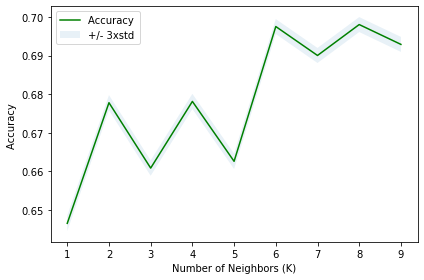

In [32]:
# Let's plot the results of the accuracy as a function of k:

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [33]:
# We can run the model again with the k yielding the best accuracy:

k = 8
neighBest = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
PredictionBestKNN = neighBest.predict(X_test)
PredictionBestKNN[0:5]

array([3., 3., 2., 2., 3.])

### Evaluation

In [34]:
print("The best test set accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1, "\n") 

# Jaccard Score
KNN_jaccard = jaccard_similarity_score(y_test, PredictionBestKNN)
print("KNN Jaccard index: ", KNN_jaccard, "\n")

# F1 score
KNN_f1_score = f1_score(y_test, PredictionBestKNN, average='weighted')
print("KNN F1-score: ", KNN_f1_score, "\n")

The best test set accuracy was with 0.6980346288124479 with k= 8 

KNN Jaccard index:  0.6980346288124479 

KNN F1-score:  0.6843524045052954 



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model 3: Logistic Regression

### Modeling

In [35]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Prediction

In [36]:
PredictionLR = LR.predict(X_test)
PredictionLRProb = LR.predict_proba(X_test)
PredictionLRProb

array([[9.97404456e-04, 6.43697849e-01, 3.42082040e-01, 1.10055033e-02,
        2.21720331e-03],
       [4.16974072e-04, 7.26559773e-01, 2.55454611e-01, 1.51319481e-02,
        2.43669400e-03],
       [1.21707476e-05, 9.11662999e-01, 8.65901497e-02, 1.66790466e-03,
        6.67759247e-05],
       ...,
       [1.67444214e-03, 7.76221596e-01, 2.09611947e-01, 1.03412592e-02,
        2.15075558e-03],
       [8.09989892e-04, 7.78480529e-01, 2.14512451e-01, 5.24605802e-03,
        9.50972324e-04],
       [1.76824322e-04, 6.77272247e-01, 3.12548789e-01, 9.18183724e-03,
        8.20302554e-04]])

### Evaluation

In [37]:
# Jaccard Score
LR_jaccard = jaccard_similarity_score(y_test, PredictionLR)
print("Logistic Regression Jaccard index: ", LR_jaccard, "\n")

# F1 score
LR_f1_score = f1_score(y_test, PredictionLR, average='weighted')
print("Logistic Regression F1-score: ", LR_f1_score, "\n")

Logistic Regression Jaccard index:  0.7241923192797775 

Logistic Regression F1-score:  0.6596232572945916 



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Final comparison between the models

##### Let's sum up the results of the models we used, by reporting the accuracy of each model in a small dataframe

In [45]:
# Let's put the output accuracy in different lists: one for the Jaccard Index, one for the F1 score and one for the Log loss

jaccard_score = [DT_jaccard, KNN_jaccard, LR_jaccard]

f1_score = [DT_f1_score, KNN_f1_score, LR_f1_score]

# fomulate the report format

results = pd.DataFrame(jaccard_score, index=['Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression'])
results.columns = ['Jaccard']
results.insert(loc=1, column='F1-score', value=f1_score)
results.columns.name = 'Algorithm'

results

Algorithm,Jaccard,F1-score
Decision Tree,0.733372,0.684546
K-Nearest Neighbors,0.698035,0.684352
Logistic Regression,0.724192,0.659623
